In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [2]:
claimsdf = pd.read_csv('/home/julian/Cursos/Ironhack/Proyectos/ProyectoFinal/Claims-Frequency-Predictions/Notebooks/claimsdf_1.csv')

In [3]:
claimsdf.head()

,ClaimNb,Exposure,Area,BonusMalus,VehBrand,Region,empirical_frequencies,VehGas_Regular,VehPower_,VehAge_,DrivAge_,log_density
0,1,0.10,4,50,9,1,10.000000,1,5,1,6,7.104144
1,1,0.77,4,50,9,1,1.298701,1,5,1,6,7.104144
2,1,0.75,2,50,9,5,1.333333,0,6,2,6,3.988984
3,1,0.09,2,50,9,7,11.111111,0,7,1,5,4.330733
4,1,0.84,2,50,9,7,1.190476,0,7,1,5,4.330733


In [4]:
claimsdf.drop(columns=['empirical_frequencies'], inplace=True)

In [5]:
#claimsdf['log_exposure'] = np.log(claimsdf['Exposure'])

In [6]:
X = claimsdf.drop(columns=['ClaimNb'])

In [7]:
y = claimsdf['ClaimNb']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2)

In [10]:
X_train = X_train.drop(columns=['Exposure'])

In [11]:
X_test = X_test.drop(columns=['Exposure'])

In [12]:
tree_model = DecisionTreeRegressor(max_depth=4, min_samples_split=10000, criterion='poisson')

In [13]:
tree_model.fit(X_train, y_train, sample_weight = X_train2['Exposure'])

DecisionTreeRegressor(criterion='poisson', max_depth=4, min_samples_split=10000)

In [14]:
y_test_pred = tree_model.predict(X_test)

In [337]:
RSME = (mean_squared_error(y_test, y_test_pred)) ** 0.5
RSME

0.23816023215313525

In [180]:
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid={
        "max_depth": [8, 9, 10],
        "min_samples_split": [1000, 5000, 10000],
        "criterion": ['poisson']
    },
    cv=5,
    verbose=1,
    scoring="neg_root_mean_squared_error",
    return_train_score=True
)

In [15]:
grid_search.fit(X_train, y_train)

NameError: name 'grid_search' is not defined

In [182]:
best_tree = grid_search.best_estimator_
best_tree

DecisionTreeRegressor(criterion='poisson', max_depth=10, min_samples_split=1000)

- Luego de una Grid Search, no hay una ganancia sustancial y pierdo explicabilidad

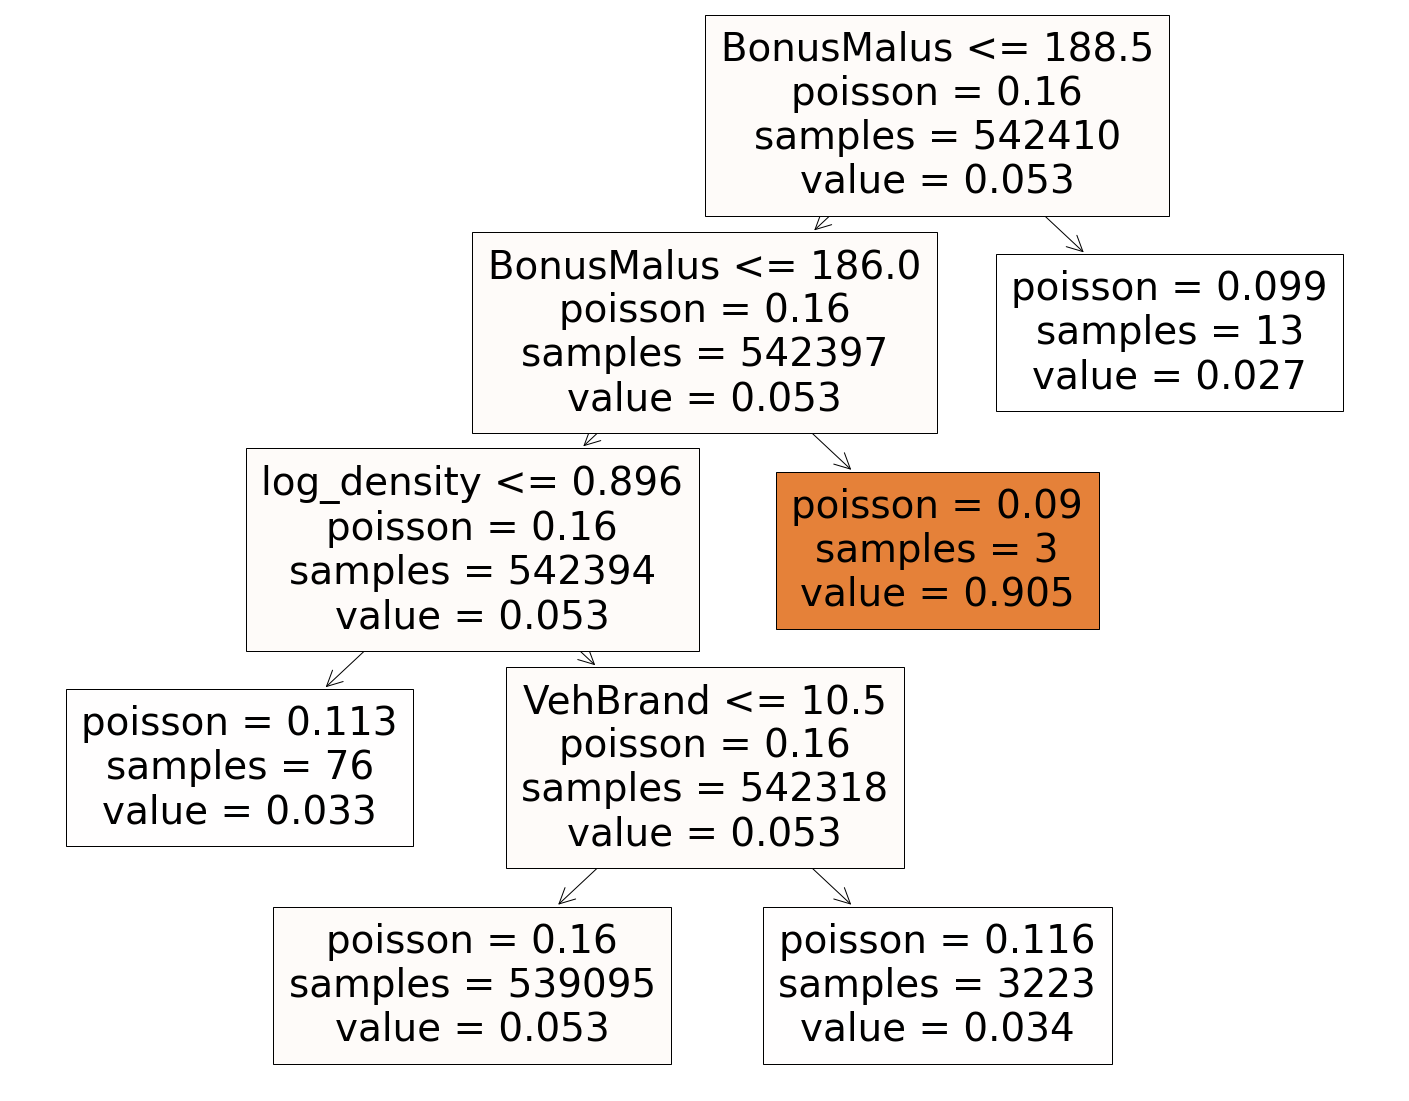

In [16]:
fig = plt.figure(figsize=(25, 20))
plot_tree(tree_model, feature_names=X_train.columns, filled=True);